In [2]:
!pip install opencv-python


In [1]:
from google.colab import files
uploaded=files.upload()

Saving gp2.jpeg to gp2.jpeg


✅ Number of faces detected: 2


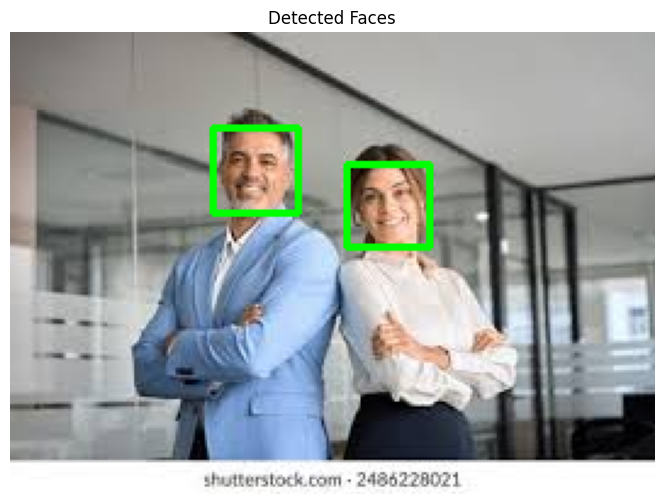

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Step 1: Read the uploaded file
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Check if image loaded correctly
if image is None:
    raise ValueError("❌ Failed to load image. Please upload again.")

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Step 4: Detect faces with tuned parameters
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.05,       # Detects more faces than 1.1
    minNeighbors=3,         # Lower means more detections (but may include false ones)
    minSize=(30, 30)        # Ignore very small objects
)

# Step 5: Draw rectangles around faces
for (x, y, w, h) in sorted(faces, key=lambda x: x[0]):
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Step 6: Print count
print(f"✅ Number of faces detected: {len(faces)}")

# Step 7: Convert BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 8: Show result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Faces")
plt.show()
